# The Perceptron

Based on a simple (the simplest) nerual net.

![http://i.stack.imgur.com/KUvpQ.png](http://i.stack.imgur.com/KUvpQ.png)


$h(x) = sign((\sum{w_ix_i}) - threshold)$

Can simplify by adding an artificial coordinate $x_0$ and $w_0$  where $x_0 = 1$ 

This makes it easy

$h(x) = sign(\sum{w_ix_i})$

or in vector notation

$h(x) = sign(w \cdot x)$



## So, how is this a learning system?

We need a learning algorithm

Supervised Learning requires a training set where we have some data and we know the answer.

1. Given a training set of $\vec x,\vec y$
2. Classify all of the points in $\vec x$
3. Pick a point $n$ from $\vec x$ that was misclassified
4. update the weight vector $\vec w$ using: $\vec w = \vec w + y_n \vec w_n$

Repeat 2 -- 4 until all points are classified correctly.  OR at some upper limit of iteration.


See https://datasciencelab.wordpress.com/2014/01/10/machine-learning-classics-the-perceptron/ for a nice writeup.

In [15]:
%matplotlib inline
import numpy as np
import random
import pandas as pd
import seaborn as sbn
sbn.set()
import matplotlib.pyplot as plt

#ts = [np.array([1,5,10]), np.array([1,3,11]), np.array([1,7,10]), np.array([1,2,3]), np.array([1,6,2]),np.array([1,1,1])]
#cls = [1,1,1,-1,-1,-1]

ts = [np.array([1,.2,.1]),np.array([1,.4,.6]),np.array([1,.5,.2]),np.array([1,.7,.9]),np.array([1,.6,.5])]
cls = [-1,1,1,-1,1]

w = np.array([1,1,1])


Plotting best solution [-1.   2.7 -1.1]


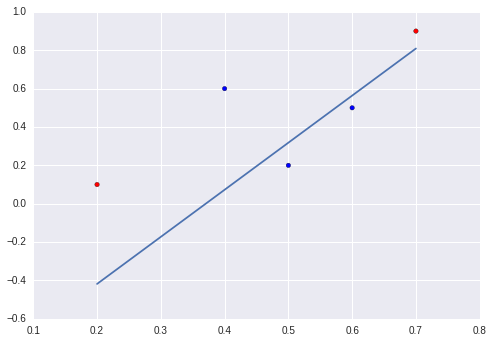

In [23]:
from ipywidgets import interact, interactive, fixed
from IPython.html import widgets

class Perceptron:
    def __init__(self, ts, tc):
        self.training_set = ts
        self.classes = tc
        self.weights = np.array([1 for i in range(len(ts[0]))])
    
    def classify(self, x):
        return np.sign(np.dot(x, self.weights))
    
    def learn(self, limit=10000):
        done = False
        count = 0
        min_incorrect = 100
        best_weights = []
        
        while not done and count < limit:
            count += 1
            self.correct = []
            self.incorrect = []
            for ix, i in enumerate(self.training_set):
                if self.classify(i) == self.classes[ix]:
                    self.correct.append(ix)
                else:
                    self.incorrect.append(ix)
                    
            if len(self.incorrect) == 0:
                done = True
            else:
                if len(self.incorrect) < min_incorrect:
                    min_incorrect = len(self.incorrect)
                    best_weights = self.weights
                p = random.randrange(len(self.incorrect))
                y = self.training_set[self.incorrect[p]]
                self.weights = self.weights + y * self.classes[self.incorrect[p]]
                #print(len(self.incorrect), self.weights)
                
        if done:
            self.plot(self.weights)
            print ("Done!", self.weights)
        else:
            self.plot(best_weights)
            print ("Plotting best solution", best_weights)
        
    def plot(self, weights):
        cols = []
        xvals = list(map(lambda x: x[1], self.training_set))
        cmap = list(map(lambda x: 'red' if x < 0 else 'blue', self.classes))
        plt.scatter(xvals, list(map(lambda x: x[2], self.training_set)), c = cmap)
        slope, intcpt = -weights[1]/weights[2], -weights[0]/weights[2]
        xvals = np.linspace(min(xvals), max(xvals))
        plt.plot(xvals, slope*xvals+intcpt)

p = Perceptron(ts, cls)
p.learn(10000)
#interact(p.learn, limit=widgets.widget_int.IntSlider(min=0, max=10000, step=100, value=1))


class newPerceptron:
    def __init__(self, ts, cls):
        self.training_set = ts
        self.classes = cls
        self.numClasses = len(np.unique(cls))
        self.allPerceptrons = dict()
        for i in np.unique(cls):
            self.allPerceptrons[i] = Perceptron(ts, np.where(cls == 1, 1, -1))
            
    def learn(self)
        for p in allPerceptrons:
            p.learn()
            
    def classify(self, x):
        for p in allPerceptrons:
            p.classify(x)

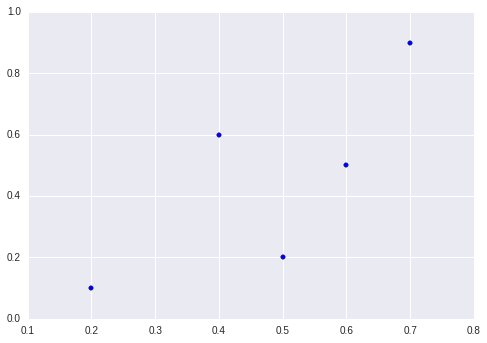

In [22]:
plt.scatter(list(map(lambda x: x[1],ts)),list(map(lambda x: x[2],ts)))

### Lets look at a classic dataset in machine learning.  The iris dataset

Attribute Information:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: 
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

Since we only can do a binary classification right now, lets look at setosa versus virginica


In [53]:
df = pd.read_csv('../Data/iris.csv',header=None)
df.columns = ['sepallen','sepalwidth','petallen','petalwidth','kind']

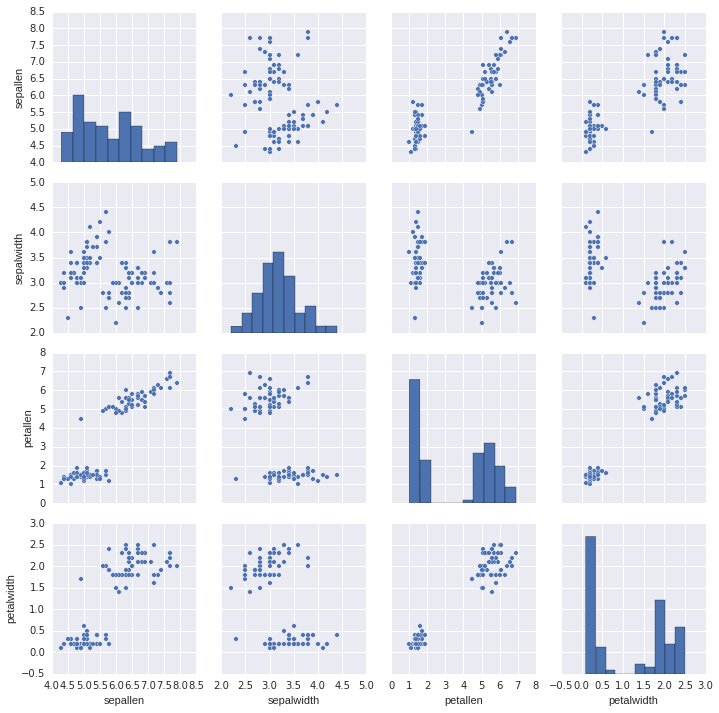

In [57]:
c = df[(df.kind == 'Iris-setosa') | (df.kind == 'Iris-virginica')]
sbn.pairplot(c[['sepallen','sepalwidth','petallen','petalwidth']])

### Lets try

Conver this into something we can use with our simple perceptron learning algorithm and see if it works.


### Lets look at a more interesting dataset

Predicting the incidence of diabetes in the Pima Indian population  using the `pima-indians-diabetes.data` file.

The columns of the file are as follows:

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)



In [42]:
df = pd.read_csv('../Data/pima-indians-diabetes.data',header=None)
df.columns = ['ntp','glucose','bp','tsft','insulin','bmi','dpf','age','class']

In [43]:
df.head()

ntp  glucose  bp  tsft  insulin   bmi    dpf  age  class
0    6      148  72    35        0  33.6  0.627   50      1
1    1       85  66    29        0  26.6  0.351   31      0
2    8      183  64     0        0  23.3  0.672   32      1
3    1       89  66    23       94  28.1  0.167   21      0
4    0      137  40    35      168  43.1  2.288   33      1

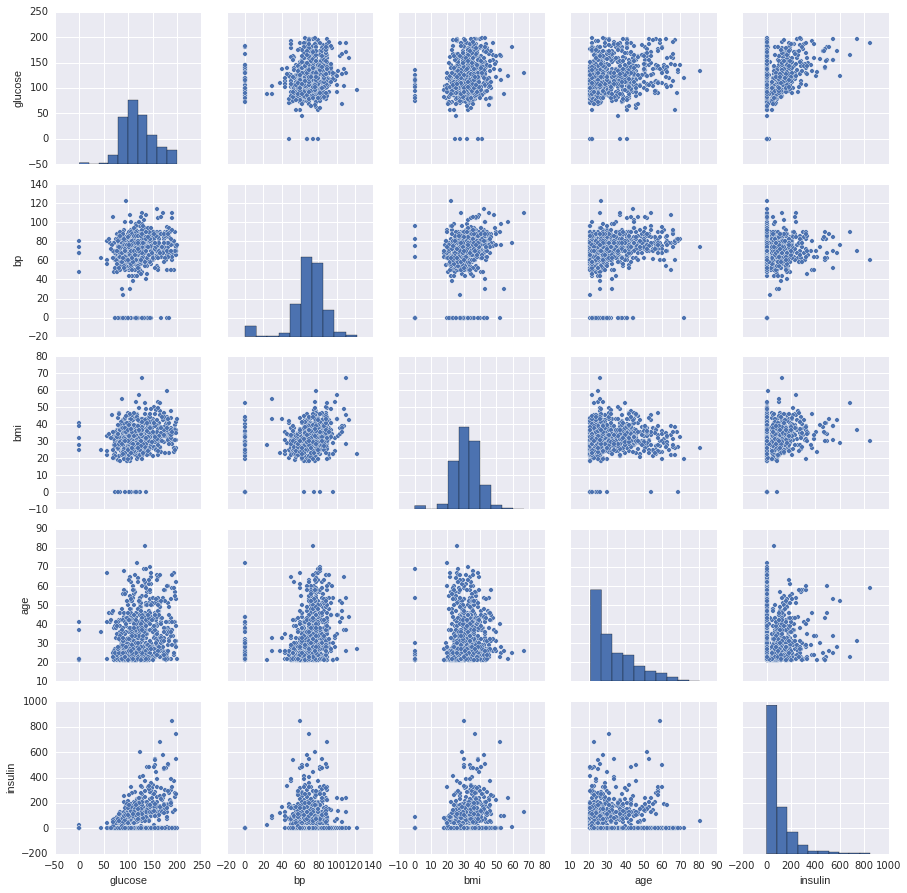

In [48]:
sbn.pairplot(df[['glucose','bp','bmi','age','insulin']])